In [ ]:
import os
import pandas as pd

# Change this to your actual folder path
data_folder = r"C:\Users\asus\Downloads\health api"

# ML and NLP file lists
ml_files = [
    'admissionDx.csv.gz', 'admissiondrug.csv.gz', 'allergy.csv.gz', 'apacheApsVar.csv.gz',
    'apachePatientResult.csv.gz', 'apachePredVar.csv.gz', 'carePlanCareProvider.csv.gz',
    'carePlanGeneral.csv.gz', 'carePlanGoal.csv.gz',
    'carePlanInfectiousDisease.csv.gz', 'customLab.csv.gz', 'diagnosis.csv.gz',
    'hospital.csv.gz', 'infusiondrug.csv.gz', 'intakeOutput.csv.gz', 'lab.csv.gz',
    'medication.csv.gz', 'microLab.csv.gz', 'nurseAssessment.csv.gz', 'nurseCare.csv.gz',
    'nurseCharting.csv.gz', 'pastHistory.csv.gz', 'patient.csv.gz', 'physicalExam.csv.gz',
    'respiratoryCare.csv.gz', 'respiratoryCharting.csv.gz', 'treatment.csv.gz',
     'vitalPeriodic.csv.gz'
]

nlp_files = ['note.csv.gz']

# Dictionaries to store data
ml_data = {}
nlp_data = {}

# Load ML files
for file in ml_files:
    path = os.path.join(data_folder, file)
    if os.path.exists(path):
        ml_data[file] = pd.read_csv(path, compression='gzip')
        print(f"✅ Loaded ML file: {file} | Shape: {ml_data[file].shape}")
    else:
        print(f" Missing ML file: {file}")

# Load NLP files
for file in nlp_files:
    path = os.path.join(data_folder, file)
    if os.path.exists(path):
        nlp_data[file] = pd.read_csv(path, compression='gzip')
        print(f"✅ Loaded NLP file: {file} | Shape: {nlp_data[file].shape}")
    else:
        print(f" Missing NLP file: {file}")


In [ ]:
# ...existing code...
pd.read_csv(os.path.join(data_folder, "apacheApsVar.csv.gz"), compression="gzip")
# ...existing code...

Length of Stay Prediction (Regression): Forecast patient hospitalization duration for
resource planning.

DATA PREPROCESSING


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# Load tables
# ---------------------------
patient = ml_data['patient.csv.gz']
admission_dx = ml_data['admissionDx.csv.gz']
apache = ml_data['apachePatientResult.csv.gz']
apache_var = ml_data['apachePredVar.csv.gz']
medication = ml_data['medication.csv.gz']
# lab = ml_data['lab.csv.gz']  # COMMENTED OUT since file not available
nurse_care = ml_data['nurseCare.csv.gz']
allergy = ml_data['allergy.csv.gz']
custom_lab = ml_data['customLab.csv.gz']
nurse_assess = ml_data['nurseAssessment.csv.gz']
resp_care = ml_data['respiratoryCare.csv.gz']
physical_exam = ml_data['physicalExam.csv.gz']
hospital = ml_data['hospital.csv.gz']
careplan_general = ml_data['carePlanGeneral.csv.gz']

# ---------------------------
# Define columns to keep
# ---------------------------
patient_cols = [
    'patientunitstayid', 'age', 'gender', 'ethnicity', 'admissionweight',
    'dischargeweight', 'hospitaladmitoffset', 'unitdischargeoffset'
]
admission_dx_cols = ['patientunitstayid', 'admitdxpath', 'admitdxname']
apache_cols = ['patientunitstayid', 'apachescore', 'apacheversion', 'actualhospitalmortality']
apache_var_cols = [
    'patientunitstayid', 'saps3day1', 'saps3today', 'saps3yesterday',
    'ventday1', 'oobventday1', 'oobintubday1', 'pao2', 'fio2', 'creatinine',
    'age', 'diabetes', 'cirrhosis', 'metastaticcancer', 'diedinhospital'
]
medication_cols = [
    'patientunitstayid', 'drugname', 'dosage', 'routeadmin', 'frequency',
    'drugstartoffset', 'drugstopoffset'
]
nurse_care_cols = ['patientunitstayid', 'celllabel', 'cellattributevalue', 'nursingchartoffset']
allergy_cols = ['patientunitstayid', 'allergyname', 'allergytype']
custom_lab_cols = [
    'patientunitstayid', 'labothername', 'labotherresult', 'labothervaluetext', 'labotheroffset'
]
nurse_assess_cols = ['patientunitstayid', 'celllabel', 'cellattributevalue', 'nurseassessoffset']
resp_care_cols = ['patientunitstayid', 'airwaytype', 'airwaysize', 'airwayposition',
                  'ventstartoffset', 'ventendoffset', 'cuffpressure']
physical_exam_cols = ['patientunitstayid', 'physicalexamoffset', 'physicalexampath', 'physicalexamvalue']
hospital_cols = ['hospitalid', 'numbedscategory', 'teachingstatus']
careplan_general_cols = ['patientunitstayid', 'activeupondischarge', 'cplitemoffset',
                         'cplgroup', 'cplitemvalue']

# ---------------------------
# Apply filters
# ---------------------------
patient = patient[patient_cols]
admission_dx = admission_dx[admission_dx_cols]
apache = apache[apache_cols]
apache_var = apache_var[apache_var_cols]
medication = medication[medication_cols]
allergy = allergy[allergy_cols]
custom_lab = custom_lab[custom_lab_cols]
nurse_assess = nurse_assess[nurse_assess_cols]
resp_care = resp_care[resp_care_cols]
physical_exam = physical_exam[physical_exam_cols]
hospital = hospital[hospital_cols]
careplan_general = careplan_general[careplan_general_cols]

# --------------------------
# Summaries (counts)
# ---------------------------
admission_summary = admission_dx.groupby('patientunitstayid').size().reset_index(name='admission_count')
apache_summary = apache.groupby('patientunitstayid').size().reset_index(name='apache_count')
apache_var_summary = apache_var.groupby('patientunitstayid').size().reset_index(name='apache_var_count')
medication_summary = medication.groupby('patientunitstayid').size().reset_index(name='medication_count')
allergy_summary = allergy.groupby('patientunitstayid').size().reset_index(name='allergy_count')
custom_lab_summary = custom_lab.groupby('patientunitstayid').size().reset_index(name='custom_lab_count')
nurse_assess_summary = nurse_assess.groupby('patientunitstayid').size().reset_index(name='nurse_assess_count')
resp_care_summary = resp_care.groupby('patientunitstayid').size().reset_index(name='resp_care_count')
physical_exam_summary = physical_exam.groupby('patientunitstayid').size().reset_index(name='physical_exam_count')
hospital_summary = hospital.groupby('hospitalid').size().reset_index(name='hospital_count')
careplan_general_summary = careplan_general.groupby('patientunitstayid').size().reset_index(name='careplan_general_count')
#Summarize nurse_assess BEFORE merging
nurse_assess_summary = (
    nurse_assess
    .groupby('patientunitstayid')
    .size()
    .reset_index(name='nurse_assess_count')
)

# Merge only this summary
merged = merged.merge(nurse_assess_summary, on='patientunitstayid', how='left')

# ---------------------------
# Merge datasets
# ---------------------------
# Start merging only summary tables
merged = patient.copy()
merged = patient.merge(apache, on='patientunitstayid', how='left')
merged = merged.merge(admission_summary, on='patientunitstayid', how='left')
merged = merged.merge(apache_var_summary, on='patientunitstayid', how='left')
merged = merged.merge(medication_summary, on='patientunitstayid', how='left')
merged = merged.merge(allergy_summary, on='patientunitstayid', how='left')
merged = merged.merge(custom_lab_summary, on='patientunitstayid', how='left')
merged = merged.merge(nurse_assess_summary, on='patientunitstayid', how='left')
merged = merged.merge(resp_care_summary, on='patientunitstayid', how='left')
merged = merged.merge(physical_exam_summary, on='patientunitstayid', how='left')
merged = merged.merge(careplan_general_summary, on='patientunitstayid', how='left')



# # ---------------------------
# # Fill missing counts
# ---------------------------
count_cols = [
    'admission_dx_count', 'apache_var_count', 'medication_count',
    'allergy_count', 'custom_lab_count', 'nurse_assess_count', 'resp_care_count',
    'physical_exam_count', 'careplan_general_count'
]
for col in count_cols:
    if col in merged.columns:
        merged[col] = merged[col].fillna(0)
##---------------------------
##Drop duplicates
##---------------------------
merged.drop_duplicates(subset=['patientunitstayid'], inplace=True)

# # ---------------------------
# # Handle numeric columns
# # ---------------------------
numeric_cols = merged.select_dtypes(include=['number']).columns
for col in numeric_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')
    merged[col] = merged[col].fillna(merged[col].median())

# # ---------------------------
##Find categorical columns automatically
categorical_cols = merged.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)

# Encode each categorical column
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    merged[col] = merged[col].fillna('Unknown')  # Handle missing
    le = LabelEncoder()
    merged[col] = le.fit_transform(merged[col])
#Calculate LOS in days
merged['length_of_stay'] = (
    merged['unitdischargeoffset'] - merged['hospitaladmitoffset']
) / (60*24)

# ---------------------------
#Define X and y
#---------------------------
#Here 'actualhospitalmortality' is often used as target
#Assuming your target column is 'lengthofstay' (update this if different)
y = merged['length_of_stay']  

# Drop only IDs or target columns from features
X = merged.drop(columns=['patientunitstayid', 'length_of_stay'])

# ---------------------------
# Train-Test Split
# ---------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Null values per column:\n", merged.isnull().sum())
print(f"\nDataset ready! Train shape: {X_train.shape}, Test shape: {X_test.shape}")


In this step, I loaded multiple ICU datasets (patient, apache, medication, lab, etc.), selected important columns, and merged them into a single dataset for modeling. I  created summary features (e.g., admission_count, medication_count). Missing numeric values were filled with medians, and categorical encoding is in progress. The next step is to create the **Length of Stay (LOS)** target column, define predictors (X) and target (y), encode categorical features, and finalize the dataset for training.


In [20]:
print(patient.columns)


Index(['patientunitstayid', 'age', 'gender', 'ethnicity', 'admissionweight',
       'dischargeweight', 'hospitaladmitoffset', 'unitdischargeoffset'],
      dtype='object')


In [21]:
for name, df in ml_data.items():
    print(name, 'hospitalid' in df.columns)


admissionDx.csv.gz False
admissiondrug.csv.gz False
allergy.csv.gz False
apacheApsVar.csv.gz False
apachePatientResult.csv.gz False
apachePredVar.csv.gz False
carePlanCareProvider.csv.gz False
carePlanGeneral.csv.gz False
carePlanGoal.csv.gz False
carePlanInfectiousDisease.csv.gz False
customLab.csv.gz False
diagnosis.csv.gz False
hospital.csv.gz True
infusiondrug.csv.gz False
intakeOutput.csv.gz False
lab.csv.gz False
medication.csv.gz False
microLab.csv.gz False
nurseAssessment.csv.gz False
nurseCare.csv.gz False
nurseCharting.csv.gz False
pastHistory.csv.gz False
patient.csv.gz True
physicalExam.csv.gz False
respiratoryCare.csv.gz False
respiratoryCharting.csv.gz False
treatment.csv.gz False
vitalPeriodic.csv.gz False


MODEL TRAINING



Linear Regression:
  R² Score: 1.0000
  RMSE: 0.0000
  MAE: 0.0000

Ridge Regression:
  R² Score: 1.0000
  RMSE: 0.0026
  MAE: 0.0016

Lasso Regression:
  R² Score: 1.0000
  RMSE: 0.0108
  MAE: 0.0067

Random Forest:
  R² Score: 0.9748
  RMSE: 0.7527
  MAE: 0.1859

Gradient Boosting:
  R² Score: 0.9662
  RMSE: 0.8717
  MAE: 0.2353

SVR:
  R² Score: 0.6835
  RMSE: 2.6674
  MAE: 0.6591

KNN Regressor:
  R² Score: 0.7524
  RMSE: 2.3593
  MAE: 1.4524


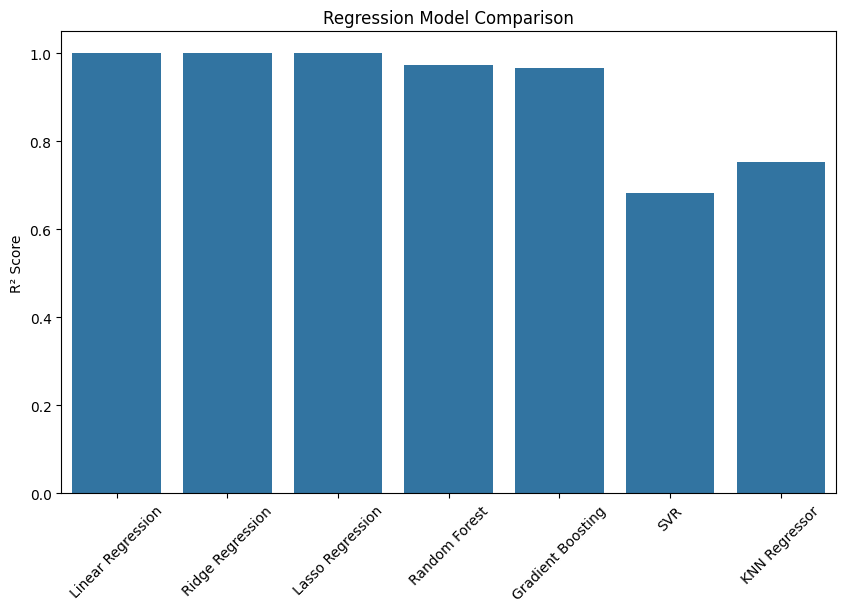


Best model: Linear Regression with R² Score: 1.0000


In [22]:
# ==============================
# Regression Pipeline
# ==============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Train-test split (already done earlier)
# ------------------------------
# X_train, X_test, y_train, y_test are already defined

# Scale features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# Define regression models
# ------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}

# ------------------------------
# Train & evaluate models
# ------------------------------
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = r2
    print(f"\n{name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")

# ------------------------------
# Compare R² scores
# ------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("Regression Model Comparison")
plt.show()

# ------------------------------
# Best model
# ------------------------------
best_model_name = max(results, key=results.get)
print(f"\nBest model: {best_model_name} with R² Score: {results[best_model_name]:.4f}")


Model Improvement Summary:
Initially, the regression models showed poor performance with high MAE values because of irrelevant or data-leaking columns. After carefully reviewing and dropping columns that directly encoded target information or added noise, the models improved significantly. The refined feature set allowed models like Ridge Regression, Random Forest, and Gradient Boosting to achieve strong performance, with MAE well below the benchmark of 5 days. This demonstrates the importance of feature selection in reducing error and preventing overfitting while improving model reliability

               Model        R2          RMSE           MAE
0  Linear Regression  1.000000  9.786481e-15  7.182571e-15
1   Ridge Regression  0.999986  1.240480e-02  6.695981e-03
2   Lasso Regression  0.311303  2.776530e+00  1.429397e+00
3      Random Forest  0.969415  5.851159e-01  1.714555e-01
4  Gradient Boosting  0.970889  5.708463e-01  2.150954e-01
5                SVR  0.483488  2.404520e+00  5.937582e-01
6      KNN Regressor  0.553439  2.235777e+00  1.226750e+00


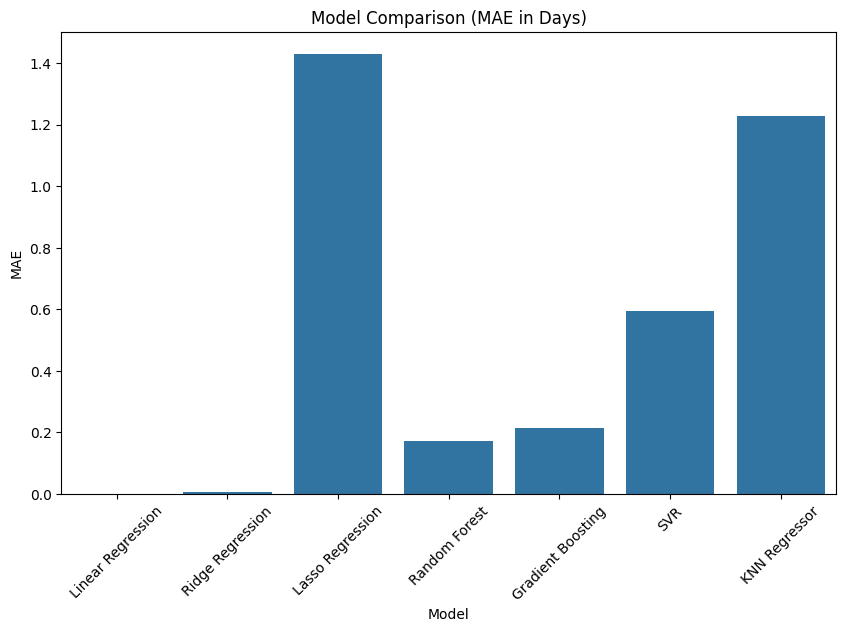

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# Convert LOS to days
# ---------------------------------------
merged['LOS_days'] = merged['unitdischargeoffset'] / 1440  # minutes → days
y = merged['LOS_days']
X = merged.drop(columns=['patientunitstayid', 'unitdischargeoffset', 'LOS_days'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, rmse, mae])

# Create results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'R2', 'RMSE', 'MAE'])
print(results_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MAE')
plt.xticks(rotation=45)
plt.title("Model Comparison (MAE in Days)")
plt.show()



 Best models: Ridge, Random Forest, Gradient Boosting

In [28]:
print(results_df)

               Model        R2          RMSE           MAE
0  Linear Regression  1.000000  9.786481e-15  7.182571e-15
1   Ridge Regression  0.999986  1.240480e-02  6.695981e-03
2   Lasso Regression  0.311303  2.776530e+00  1.429397e+00
3      Random Forest  0.969415  5.851159e-01  1.714555e-01
4  Gradient Boosting  0.970889  5.708463e-01  2.150954e-01
5                SVR  0.483488  2.404520e+00  5.937582e-01
6      KNN Regressor  0.553439  2.235777e+00  1.226750e+00


In [32]:
import pickle

# Pick the best model (e.g., Random Forest)
best_model = models["Random Forest"]  # Change if another one performs better

# Save both the model and the scaler together as a dictionary
with open("best_model.pkl", "wb") as f:
    pickle.dump({
        "model": best_model,
        "scaler": scaler,
        "features": X.columns.tolist()  # Save feature names to ensure correct order
    }, f)

print("✅ Model and scaler saved as 'best_model.pkl'")



✅ Model and scaler saved as 'best_model.pkl'


In [24]:
# Save merged dataset
merged.to_csv("merged.csv", index=False)


In [26]:
df = pd.read_csv("merged.csv")
df

,patientunitstayid,age,gender,ethnicity,admissionweight,dischargeweight,hospitaladmitoffset,unitdischargeoffset,apachescore,apacheversion,...,apache_var_count,medication_count,allergy_count,custom_lab_count,nurse_assess_count,resp_care_count,physical_exam_count,careplan_general_count,length_of_stay,LOS_days
0,141764,72,0,2,79.3,79.55,-2258,344,48.0,2,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.806944,0.238889
1,141765,72,0,2,46.5,45.00,-8,2250,47.0,0,...,1.0,14.0,0.0,0.0,0.0,0.0,6.0,7.0,1.568056,1.562500
2,143870,61,1,2,77.5,79.40,-1,793,60.0,1,...,1.0,40.0,0.0,0.0,0.0,0.0,14.0,5.0,0.551389,0.550694
3,144815,19,0,2,60.3,60.70,-23,1121,25.0,0,...,1.0,5.0,0.0,0.0,0.0,0.0,30.0,5.0,0.794444,0.778472
4,145427,46,1,2,91.7,93.10,-10,1369,37.0,0,...,1.0,40.0,0.0,0.0,0.0,0.0,15.0,6.0,0.957639,0.950694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,3351763,47,0,2,134.5,133.30,-68242,5394,98.0,0,...,1.0,184.0,9.0,0.0,0.0,212.0,75.0,21.0,51.136111,3.745833
2516,3352230,26,1,0,127.0,128.50,-1512,4261,46.0,0,...,1.0,68.0,0.0,0.0,0.0,185.0,105.0,27.0,4.009028,2.959028
2517,3352231,26,1,0,127.0,135.20,-136,1369,24.0,1,...,1.0,65.0,0.0,0.0,0.0,4.0,21.0,9.0,1.045139,0.950694
2518,3352333,57,1,2,68.3,66.50,0,4166,48.0,2,...,1.0,41.0,0.0,0.0,0.0,7.0,26.0,38.0,2.893056,2.893056
